In [6]:
import pandas as pd

**Import csv**

In [7]:
label_file_india = "./india_BMI.csv"
label_file_holly = "vip/annotation.csv"
label_file_prison = "images/output.csv"

In [8]:
india_df = pd.read_csv(label_file_india)
holly_df = pd.read_csv(label_file_holly)
prison_df = pd.read_csv(label_file_prison)

<strong>Images Datasets</strong>

In [9]:
from glob import glob
from pathlib import Path as p

<strong>Get Image Path Fuction</strong>

In [10]:
def get_index_of_digit(string):
    import re
    match = re.search("\d", p(string).stem)
    return match.start(0)

In [11]:
data_folder_india = "india_images"
data_folder_holly = "vip/data"
data_folder_prison = "images"

<strong>Get India Images</strong>

In [12]:
india_files = glob(data_folder_india+"/*")
india_jpgs = sorted([img for img in india_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("India Total {} photos ".format(len(india_jpgs)))

India Total 226 photos 


In [13]:
ind_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in india_jpgs ]
ind_image_df = pd.DataFrame(ind_path,columns=['UID','path'])
# print(ind_image_df)
ind_data_df = ind_image_df.merge(india_df)
# ind_data_df
ind_data_df = ind_data_df.drop(columns=['UID', 'id','name'])
ind_data_df

path  height  weight        BMI
0    india_images/akshay1.jpeg    1.78      80  25.249337
1    india_images/akshay10.jpg    1.78      80  25.249337
2    india_images/akshay11.jpg    1.78      80  25.249337
3    india_images/akshay12.jpg    1.78      80  25.249337
4    india_images/akshay13.jpg    1.78      80  25.249337
..                         ...     ...     ...        ...
221    india_images/vikky5.jpg    1.83      80  23.888441
222    india_images/vikky6.jpg    1.83      80  23.888441
223    india_images/vikky7.jpg    1.83      80  23.888441
224    india_images/vikky8.jpg    1.83      80  23.888441
225    india_images/vikky9.jpg    1.83      80  23.888441

[226 rows x 4 columns]

<strong>Get Hollywood Images</strong>

In [14]:
holly_files = glob(data_folder_holly+"/*")
holly_jpgs = sorted([img for img in holly_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("Hollywood Total {} photos ".format(len(holly_jpgs)))

Hollywood Total 1026 photos 


In [15]:
hol_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in holly_jpgs ]
hol_image_df = pd.DataFrame(hol_path,columns=['UID','path'])
# print(hol_image_df)
hol_data_df = pd.concat( [hol_image_df, holly_df], axis=1 )
# hol_data_df
hol_data_df = hol_data_df.drop(columns=['UID', 'image'])
hol_data_df

path  height  weight        BMI
0     vip/data/f_001.jpg    1.55    61.0  25.390219
1     vip/data/f_002.jpg    1.76    85.0  27.440599
2     vip/data/f_003.jpg    1.78    56.0  17.674536
3     vip/data/f_004.jpg    1.63    63.0  23.711845
4     vip/data/f_005.jpg    1.76    54.0  17.432851
...                  ...     ...     ...        ...
1021  vip/data/m_509.jpg    1.91   116.0  31.797374
1022  vip/data/m_510.jpg    1.93   111.0  29.799458
1023  vip/data/m_511.jpg    1.88   109.0  30.839746
1024  vip/data/m_512.jpg    1.78    75.0  23.671254
1025  vip/data/m_513.jpg    2.21   137.0  28.050204

[1026 rows x 4 columns]

<strong>Get Prison Images</strong>

In [16]:
prison_files = glob(data_folder_prison+"/*")
prison_jpgs = sorted([img for img in prison_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])
print("Prison Total {} photos ".format(len(prison_jpgs)))

Prison Total 301 photos 


In [17]:
pri_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in prison_jpgs ]
pri_image_df = pd.DataFrame(pri_path,columns=['UID','path'])
# print(hol_image_df)
pri_data_df = pd.concat( [pri_image_df, prison_df], axis=1 )
# pri_data_df
pri_data_df = pri_data_df.drop(columns=['Unnamed: 0', 'UID'])
pri_data_df

path  height      weight        BMI
0      images/1.jpg  1.7780   79.378665  25.109628
1     images/10.jpg  1.8288   95.254398  28.480828
2    images/100.jpg  1.6764   61.688562  21.950749
3    images/101.jpg  1.7780   63.502932  20.087702
4    images/102.jpg  1.7780   72.574779  22.957374
..              ...     ...         ...        ...
296   images/95.jpg  1.8796  115.666054  32.739727
297   images/96.jpg  1.8034   63.502932  19.525836
298   images/97.jpg  1.8034   63.502932  19.525836
299   images/98.jpg  1.8034   63.502932  19.525836
300   images/99.jpg  1.7272   63.502932  21.286709

[301 rows x 4 columns]

## Extract face embedding using facenet pretrained architecture

In [18]:
import face_recognition
import numpy as np

<strong>Define Face Recognition Function</strong>

In [4]:
def get_face_encoding(image_path):
    print(image_path, end = "")
    try:  
        picture_of_me = face_recognition.load_image_file(image_path)
        my_face_encoding = face_recognition.face_encodings(picture_of_me)
        if not my_face_encoding:
            print("  =====>  No face found!!!")
            return np.zeros(128).tolist(), 0
        print("  =====>  OK!!!")
        return my_face_encoding[0].tolist(), 1
    except(OSError, NameError):
        print('  =====>  OSError, Path:',image_path)
        return np.zeros(128).tolist(), 0

**Define dlib function**

In [5]:
import cv2
import dlib

def getEyesCenter(p1, p2, p3, p4):
    x1 = p1[0]
    x2 = p2[0]
    x3 = p3[0]
    x4 = p4[0]
    y1 = p1[1]
    y2 = p2[1]
    y3 = p3[1]
    y4 = p4[1]
    x = (x1+x2+x3+x4)/4
    y = (y1+y2+y3+y4)/4
    return x, y



def getPointsDistance(x1, y1, x2, y2):
    return np.sqrt(np.square(x1-x2)+np.square(y1-y2))


def faceDistance(path):
    img = cv2.imread(path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
    rects = detector(img_gray, 0)
    chinDis = 0
    eyesDis = 0
    
    for i in range(len(rects)):
        landmarks = np.matrix([[p.x, p.y] for p in predictor(img,rects[i]).parts()]) 
        landmarks = np.array(landmarks)
        chinDis = getPointsDistance(landmarks[4][0], landmarks[4][1], landmarks[12][0], landmarks[12][1])
        leftEyesX, leftEyesY = getEyesCenter(landmarks[37], landmarks[38], landmarks[40], landmarks[41])
        rightEyesX, rightEyesY = getEyesCenter(landmarks[43], landmarks[44], landmarks[46], landmarks[48])
        eyesDis = getPointsDistance(leftEyesX, leftEyesY, rightEyesX, rightEyesY)
    return chinDis, eyesDis

In [54]:
all_data_df = pd.concat([ind_data_df, pri_data_df, hol_data_df],  ignore_index = True)
all_data_df

path  height  weight        BMI
0     india_images/akshay1.jpeg    1.78    80.0  25.249337
1     india_images/akshay10.jpg    1.78    80.0  25.249337
2     india_images/akshay11.jpg    1.78    80.0  25.249337
3     india_images/akshay12.jpg    1.78    80.0  25.249337
4     india_images/akshay13.jpg    1.78    80.0  25.249337
...                         ...     ...     ...        ...
1548         vip/data/m_509.jpg    1.91   116.0  31.797374
1549         vip/data/m_510.jpg    1.93   111.0  29.799458
1550         vip/data/m_511.jpg    1.88   109.0  30.839746
1551         vip/data/m_512.jpg    1.78    75.0  23.671254
1552         vip/data/m_513.jpg    2.21   137.0  28.050204

[1553 rows x 4 columns]

<strong>Get Features</strong>

In [55]:
all_faces = np.zeros([len(all_data_df), 128])
distances = np.zeros(len(all_data_df))
ok = np.zeros(len(all_data_df))

In [70]:
for i in range(len(all_data_df)):
    image = all_data_df.path[i]
    face_enc, comf = get_face_encoding(image)
    all_faces[i] = face_enc
    chins, eyes = faceDistance(image)
    if comf == 1 and (chins * eyes) != 0:
        distances[i] = eyes/chins
        ok[i] = 1

india_images/akshay1.jpeg  =====>  OK!!!
india_images/akshay10.jpg  =====>  OK!!!
india_images/akshay11.jpg  =====>  OK!!!
india_images/akshay12.jpg  =====>  OK!!!
india_images/akshay13.jpg  =====>  OK!!!
india_images/akshay14.jpg  =====>  OK!!!
india_images/akshay15.jpg  =====>  OK!!!
india_images/akshay16.jpg  =====>  OK!!!
india_images/akshay17.jpg  =====>  OK!!!
india_images/akshay18.jpg  =====>  OK!!!
india_images/akshay19.jpg  =====>  OK!!!
india_images/akshay2.jpeg  =====>  No face found!!!
india_images/akshay20.jpg  =====>  OK!!!
india_images/akshay3.jpg  =====>  OK!!!
india_images/akshay4.jpg  =====>  OK!!!
india_images/akshay5.jpg  =====>  OK!!!
india_images/akshay6.jpg  =====>  OK!!!
india_images/akshay7.jpg  =====>  OK!!!
india_images/akshay8.jpg  =====>  OK!!!
india_images/akshay9.jpg  =====>  OK!!!
india_images/amir1.jpg  =====>  OK!!!
india_images/amir10.jpg  =====>  OK!!!
india_images/amir11.jpg  =====>  OK!!!
india_images/amir12.jpg  =====>  OK!!!
india_images/amir13.j

In [115]:
face_enc = all_faces[ok.astype(bool)]
dist = distances[ok.astype(bool)].reshape(-1, 1)
bmi = all_data_df[ok.astype(bool)].BMI.reset_index(drop=True)

**Prepare Data for training**

In [102]:
X = np.concatenate([face_enc, dist], axis = 1)
X

array([[-0.07622097,  0.1339919 ,  0.01741225, ..., -0.01829976,
         0.03399567,  0.37500556],
       [-0.09389114,  0.12195004,  0.02302   , ...,  0.04336348,
         0.08225571,  0.46376021],
       [-0.15134026,  0.11457374,  0.02870863, ..., -0.03146559,
         0.04266899,  0.46958041],
       ...,
       [-0.08508033,  0.15873533,  0.06203996, ...,  0.01797652,
         0.08695802,  0.45434284],
       [-0.07636127,  0.11790439,  0.09830734, ...,  0.04545414,
         0.0601996 ,  0.42138595],
       [-0.11483407,  0.08498795, -0.001677  , ...,  0.0674967 ,
         0.0407754 ,  0.48440414]])

In [126]:
bmi_c = np.empty(len(bmi), dtype=object)
for i in range(len(bmi)):
    if bmi[i] < 18.5:
        bmi_c[i] = 'Underweight'
    elif bmi[i] >= 18.5 and bmi[i] < 25:
        bmi_c[i] = 'Normalweight'
    elif bmi[i] >= 25 and bmi[i] < 30:
        bmi_c[i] = 'Pre-obesity'
    else:
        bmi_c[i] = 'Obesity'
        
bmi_c

array(['Pre-obesity', 'Pre-obesity', 'Pre-obesity', ..., 'Obesity',
       'Normalweight', 'Pre-obesity'], dtype=object)

**Training test split**

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

ss = ShuffleSplit(n_splits=1, test_size=0.1)
ss.get_n_splits(X, bmi_c)
train, test = next(ss.split(X, bmi_c)) 


x_train = X[train]
x_test = X[test]
y_train = bmi[train]
y_test = bmi[test]
cy_train = bmi_c[train]
cy_test = bmi_c[test]
y_test = y_train - y_train.mean()
y_train = y_test - y_train.mean()

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-2.00342001, -0.58542258, -0.72472622, ...,  0.61738193,
        -0.41816808,  0.31539431],
       [-0.38953463, -1.63496421, -1.45978179, ..., -0.59423628,
        -0.79372697,  0.16100103],
       [ 0.07012976,  0.62434292, -0.9251588 , ..., -0.18047314,
        -0.52462335, -0.06197558],
       ...,
       [ 0.82643738,  1.20761013,  0.27205706, ...,  0.67913799,
        -0.30536972, -0.51326815],
       [-1.35002715,  2.02045604,  0.75927777, ..., -0.04475328,
        -0.44687408, -0.31564637],
       [ 1.24612475, -0.31079265, -1.11434649, ..., -1.3541373 ,
         0.65910102, -1.41997301]])

**Resampling for unbalanced data**

In [135]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=810)
x_train_res, cy_train_res = sm.fit_resample(x_train, cy_train)
cy_train_res

array(['Normalweight', 'Normalweight', 'Pre-obesity', ..., 'Underweight',
       'Underweight', 'Underweight'], dtype=object)

In [136]:
y_train_c = np.array(cy_train_res)

y_train_c = np.where(y_train_c == "Underweight", '0', y_train_c)
y_train_c = np.where(y_train_c == 'Normalweight', '1', y_train_c)
y_train_c = np.where(y_train_c == 'Pre-obesity', '2', y_train_c)
y_train_c = np.where(y_train_c == "Obesity", '3', y_train_c)
# y_train_c

y_test_c = np.array(cy_test)
y_test_c = np.where(y_test_c == "Underweight", '0', y_test_c)
y_test_c = np.where(y_test_c == 'Normalweight', '1', y_test_c)
y_test_c = np.where(y_test_c == 'Pre-obesity', '2', y_test_c)
y_test_c = np.where(y_test_c == "Obesity", '3', y_test_c)
# y_test_c

from keras.utils.np_utils import to_categorical

y_train_c = to_categorical(y_train_c, num_classes = 4)
y_train_c
y_test_c = to_categorical(y_test_c, num_classes = 4)
y_test_c

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],


**Import Keras**

In [138]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics

**Classification model**

In [158]:
model_c = Sequential()
model_c.add(Dense(units=64, activation='tanh', input_dim=129))
model_c.add(Dense(units=32, activation='tanh'))
model_c.add(Dropout(0.2))
model_c.add(Dense(units=8, activation='tanh'))
model_c.add(Dropout(0.2))
model_c.add(Dense(units=4, activation='softmax'))

opt = optimizers.adam(lr=0.001)
def top_2(y_true, y_pred):
    return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2)

model_c.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['categorical_accuracy', top_2])
model_c.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                8320      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
Total params: 10,700
Trainable params: 10,700
Non-trainable params: 0
__________________________________________________

In [169]:
model_c.fit(x_train_res, y_train_c, epochs=5, batch_size=32)

Epoch 1/5
3372/3372 [==============================] - 0s 119us/step - loss: 0.1121 - categorical_accuracy: 0.9721 - top_2: 0.9941
Epoch 2/5
3372/3372 [==============================] - 0s 94us/step - loss: 0.1033 - categorical_accuracy: 0.9763 - top_2: 0.9961
Epoch 3/5
3372/3372 [==============================] - 0s 102us/step - loss: 0.1085 - categorical_accuracy: 0.9715 - top_2: 0.9953
Epoch 4/5
3372/3372 [==============================] - 0s 93us/step - loss: 0.0998 - categorical_accuracy: 0.9745 - top_2: 0.9947
Epoch 5/5
3372/3372 [==============================] - 0s 105us/step - loss: 0.0977 - categorical_accuracy: 0.9748 - top_2: 0.9964


In [170]:
y_pred = model_c.predict(x_test)
model_c.evaluate(x_test, y_test_c, batch_size=32)

145/145 [==============================] - 0s 65us/step


[1.8713886507626238, 0.5448275804519653, 0.8551723957061768]

**Present result**

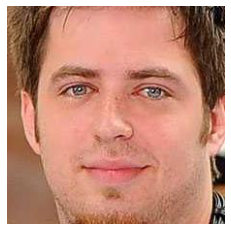

0
vip/data/m_291.jpg
1
2


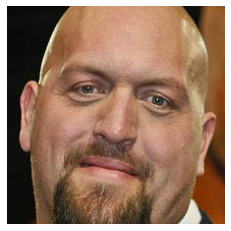

1
vip/data/m_363.jpg
1
3


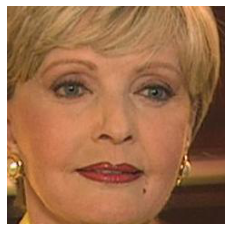

6
vip/data/f_140.jpg
3
1


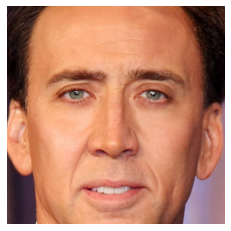

8
vip/data/m_350.jpg
1
2


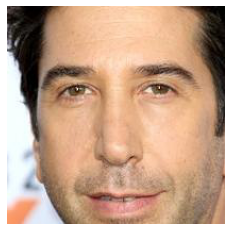

9
vip/data/m_093.jpg
3
2


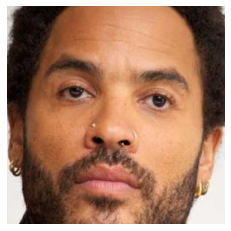

10
vip/data/m_292.jpg
1
2


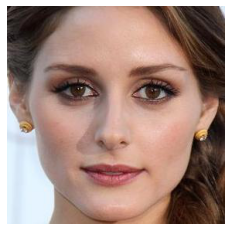

11
vip/data/f_395.jpg
1
0


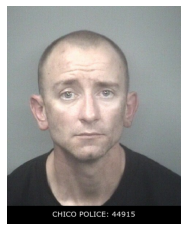

14
images/143.jpg
1
2


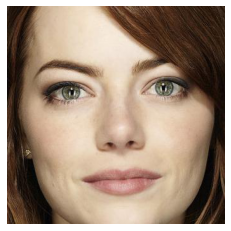

15
vip/data/f_124.jpg
2
0


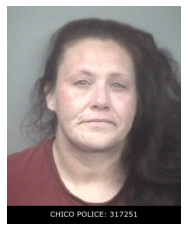

16
images/257.jpg
3
1


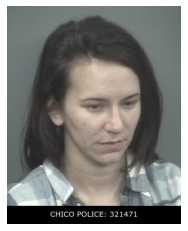

17
images/259.jpg
1
2


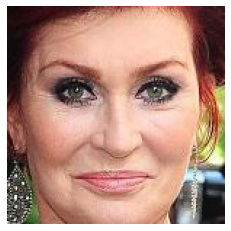

20
vip/data/f_459.jpg
0
1


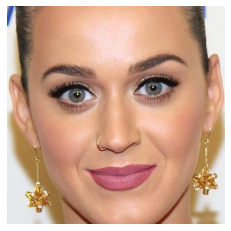

22
vip/data/f_255.jpg
0
1


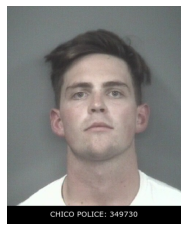

24
images/151.jpg
3
2


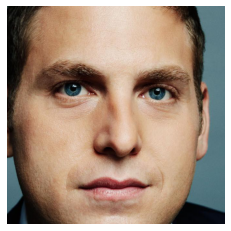

28
vip/data/m_245.jpg
1
3


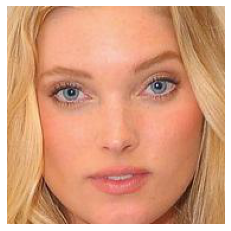

30
vip/data/f_117.jpg
1
0


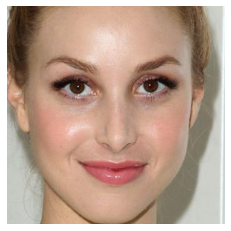

31
vip/data/f_502.jpg
1
0


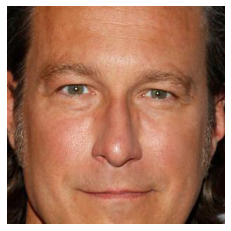

32
vip/data/m_229.jpg
1
2


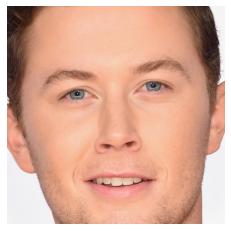

35
vip/data/m_426.jpg
2
1


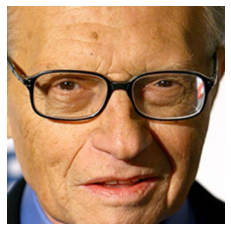

37
vip/data/m_289.jpg
1
2


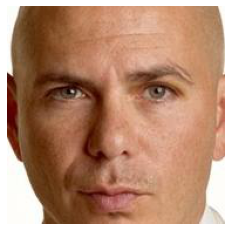

47
vip/data/m_375.jpg
3
2


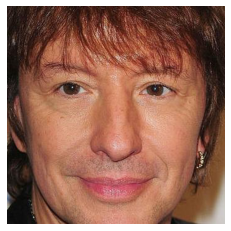

48
vip/data/m_394.jpg
1
2


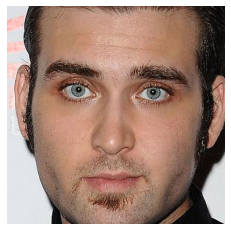

49
vip/data/m_486.jpg
2
1


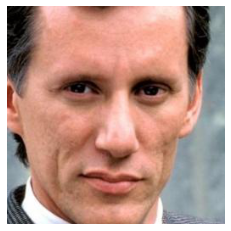

53
vip/data/m_183.jpg
1
2


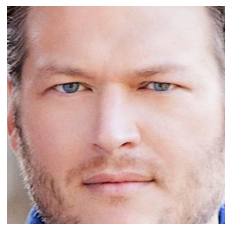

57
vip/data/m_029.jpg
1
2


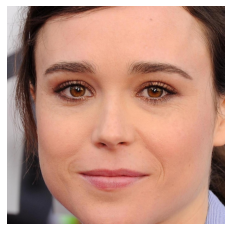

58
vip/data/f_114.jpg
2
1


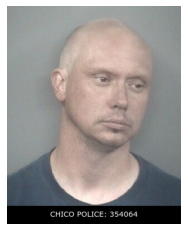

60
images/178.jpg
3
1


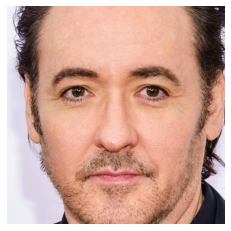

61
vip/data/m_230.jpg
2
1


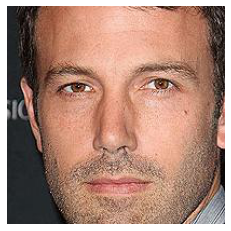

63
vip/data/m_020.jpg
1
2


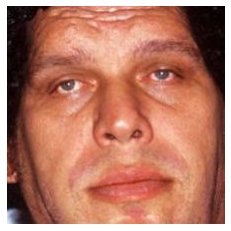

64
vip/data/m_011.jpg
1
3


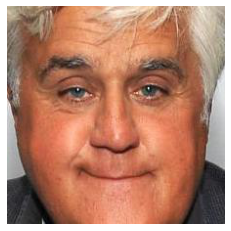

66
vip/data/m_204.jpg
3
2


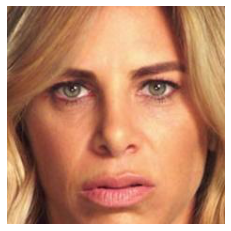

67
vip/data/f_217.jpg
0
1


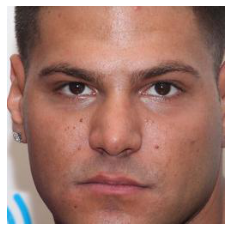

70
vip/data/m_406.jpg
2
3


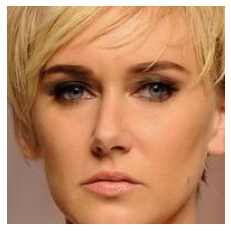

73
vip/data/f_277.jpg
2
0


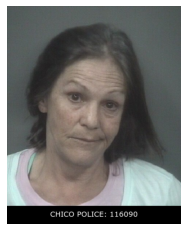

76
images/47.jpg
2
1


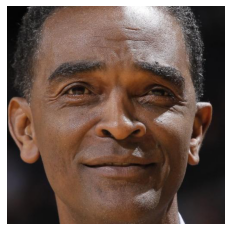

79
vip/data/m_382.JPG
2
1


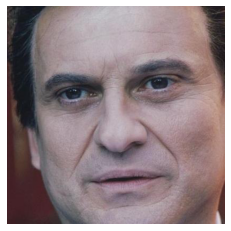

80
vip/data/m_225.jpg
1
2


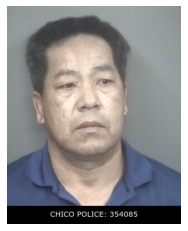

84
images/173.jpg
3
1


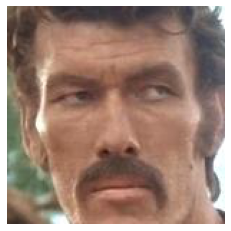

86
vip/data/m_459.jpg
1
3


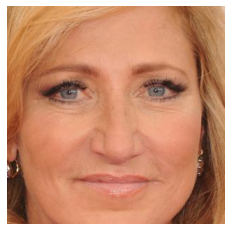

87
vip/data/f_102.jpg
3
1


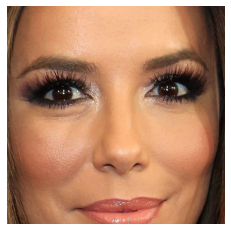

88
vip/data/f_130.jpg
0
1


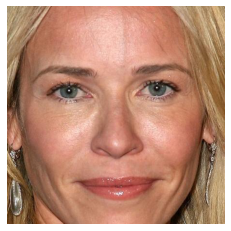

89
vip/data/f_068.jpg
2
1


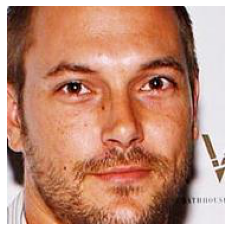

91
vip/data/m_274.jpg
0
2


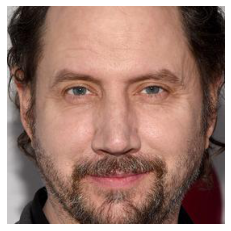

99
vip/data/m_187.jpg
2
1


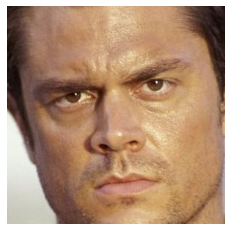

102
vip/data/m_241.jpg
2
1


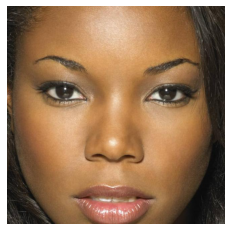

105
vip/data/f_146.jpg
2
1


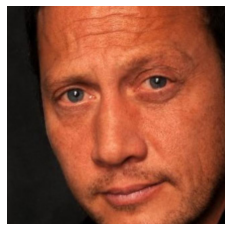

106
vip/data/m_399.jpg
2
1


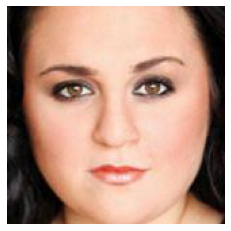

109
vip/data/f_390.jpg
1
3


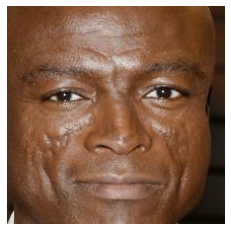

115
vip/data/m_427.jpg
1
2


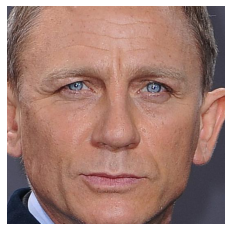

118
vip/data/m_079.jpg
1
2


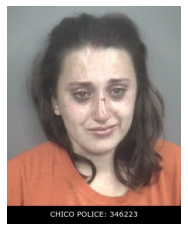

120
images/30.jpg
1
2


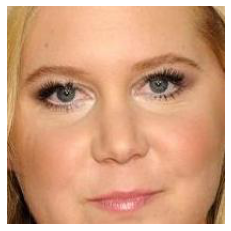

122
vip/data/f_016.jpg
0
1


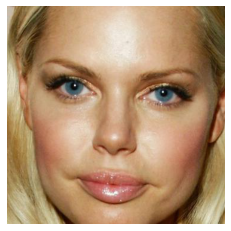

123
vip/data/f_471.jpg
0
1


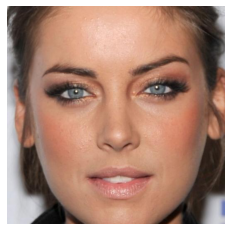

124
vip/data/f_213.jpg
1
0


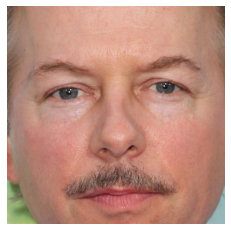

126
vip/data/m_094.jpg
2
1


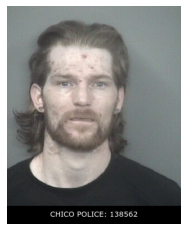

127
images/28.jpg
1
2


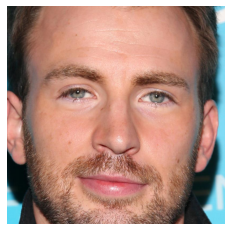

129
vip/data/m_055.jpg
1
2


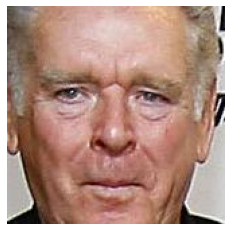

131
vip/data/m_038.jpg
2
1


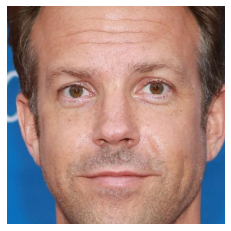

133
vip/data/m_201.jpg
1
2


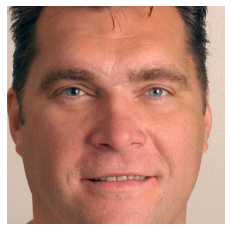

134
vip/data/m_016.jpg
1
2


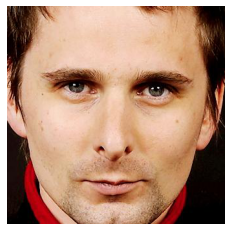

136
vip/data/m_322.jpg
2
1


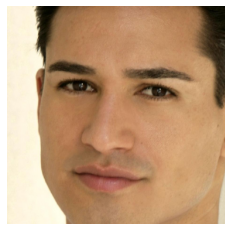

137
vip/data/m_308.jpg
1
2


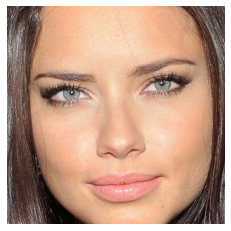

139
vip/data/f_003.jpg
1
0


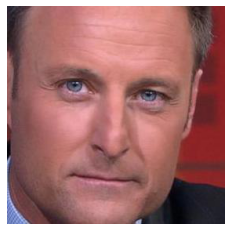

140
vip/data/m_056.jpg
1
2


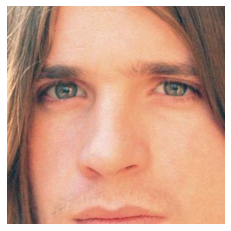

142
vip/data/m_354.jpg
2
1


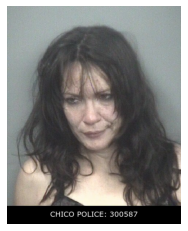

143
images/52.jpg
1
3


In [171]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

y_df = all_data_df[ok.astype(bool)].reset_index(drop=True)

for i in range(len(test)):
    if y_pred[i].argmax() != y_test_c[i].argmax():
        img = mpimg.imread(y_df.loc[test[i]].path)
        plt.imshow(img) 
        plt.axis('off') 
        plt.show()
        print(i)
        print(y_df.loc[test[i]].path)
        print(y_pred[i].argmax())
        print(y_test_c[i].argmax())

**K-fold cross validation**

In [177]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=81000)

cvscores = []

for train, test in kfold.split(x_train_res, cy_train_res):
    
    CY = np.array(cy_train_res)
    CY = np.where(CY == "Underweight", '0', CY)
    CY = np.where(CY == 'Normalweight', '1', CY)
    CY = np.where(CY == 'Pre-obesity', '2', CY)
    CY = np.where(CY == "Obesity", '3', CY)
    CY = to_categorical(CY, num_classes = 4)
    
    model_c = Sequential()
    model_c.add(Dense(units=64, activation='tanh', input_dim=129))
    model_c.add(Dense(units=32, activation='tanh'))
    model_c.add(Dropout(0.2))
    model_c.add(Dense(units=8, activation='tanh'))
    model_c.add(Dropout(0.2))
    model_c.add(Dense(units=4, activation='softmax'))

    opt = optimizers.adam(lr=0.001)
    def top_2(y_true, y_pred):
        return metrics.top_k_categorical_accuracy(y_true, y_pred, k=2)

    model_c.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['categorical_accuracy', top_2])
    
    model_c.fit(x_train_res[train], CY[train], epochs=15, batch_size=32)
    scores = model_c.evaluate(x_train_res[test], CY[test], verbose=0)
    print("%s: %.2f%%" % (model_c.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/15
2697/2697 [==============================] - 1s 437us/step - loss: 1.1216 - categorical_accuracy: 0.5310 - top_2: 0.7824
Epoch 2/15
2697/2697 [==============================] - 0s 103us/step - loss: 0.8877 - categorical_accuracy: 0.6459 - top_2: 0.8776
Epoch 3/15
2697/2697 [==============================] - 0s 102us/step - loss: 0.7788 - categorical_accuracy: 0.7034 - top_2: 0.9062
Epoch 4/15
2697/2697 [==============================] - 0s 103us/step - loss: 0.6937 - categorical_accuracy: 0.7364 - top_2: 0.9270
Epoch 5/15
2697/2697 [==============================] - 0s 103us/step - loss: 0.6298 - categorical_accuracy: 0.7772 - top_2: 0.9403
Epoch 6/15
2697/2697 [==============================] - 0s 102us/step - loss: 0.5594 - categorical_accuracy: 0.8072 - top_2: 0.9522
Epoch 7/15
2697/2697 [==============================] - 0s 102us/step - loss: 0.4932 - categorical_accuracy: 0.8306 - top_2: 0.9644
Epoch 8/15
2697/2697 [==============================] - 0s 103us/step - loss